<a href="https://colab.research.google.com/github/novacontar/ml-test/blob/main/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (8, 8),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
}

pylab.rcParams.update(params)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#----------------------------------------------------------
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

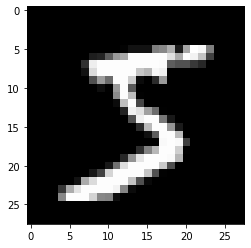

In [5]:
plt.imshow(X_train[0], cmap='gray')

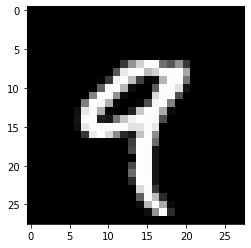

In [6]:
plt.imshow(X_train[4], cmap='gray')

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [8]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [9]:
def plot_loss(hist):
    loss = hist.history['loss']
    plt.plot(range(len(loss)), loss)
    plt.title('loss')
    plt.xlabel('epochs')

In [15]:
model = keras.models.Sequential()
# model.add(layers.Dense(32, input_shape=(28 * 28, 1), layers.activation='relu', name='hidden1'))
model.add(Dense(32, input_shape=(28 * 28, ), activation='relu', name='hidden1'))
model.add(Dense(16, activation='relu', name='hidden2'))
model.add(Flatten())
model.add(Dense(10, activation='softmax', name='out'))


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #'sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'],
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                25120     
                                                                 
 hidden2 (Dense)             (None, 16)                528       
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 out (Dense)                 (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(
    X_train, 
    y_train, 
    batch_size=128, 
    epochs=10,
    verbose=2,
)

Epoch 1/10
469/469 - 1s - loss: 0.0820 - accuracy: 0.9761 - 1s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.0775 - accuracy: 0.9770 - 896ms/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.0745 - accuracy: 0.9778 - 955ms/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.0711 - accuracy: 0.9788 - 888ms/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0684 - accuracy: 0.9798 - 904ms/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0657 - accuracy: 0.9802 - 951ms/epoch - 2ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0638 - accuracy: 0.9812 - 961ms/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0614 - accuracy: 0.9819 - 979ms/epoch - 2ms/step
Epoch 9/10
469/469 - 1s - loss: 0.0587 - accuracy: 0.9827 - 977ms/epoch - 2ms/step
Epoch 10/10
469/469 - 1s - loss: 0.0565 - accuracy: 0.9829 - 956ms/epoch - 2ms/step


In [22]:
model.history.history

{'accuracy': [0.9453666806221008,
  0.9517833590507507,
  0.9568666815757751,
  0.9615333080291748,
  0.9649333357810974,
  0.9677500128746033,
  0.9697166681289673,
  0.9718166589736938,
  0.9738333225250244,
  0.9741666913032532],
 'loss': [0.18824641406536102,
  0.1623702347278595,
  0.14429466426372528,
  0.12943895161151886,
  0.11923294514417648,
  0.1091051995754242,
  0.10236623883247375,
  0.09579698741436005,
  0.09012482315301895,
  0.08612150698900223]}

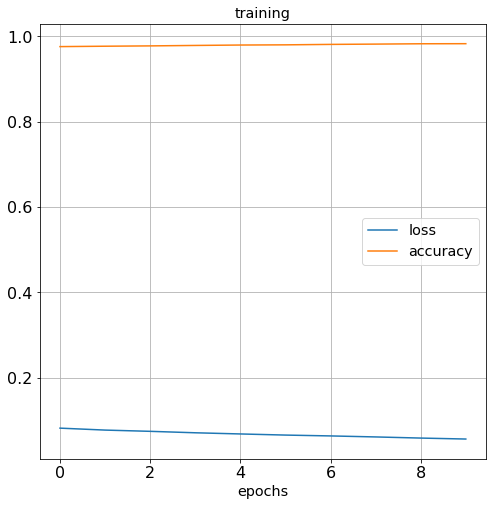

In [42]:
pd.DataFrame(model.history.history).plot(
    grid=True,
    fontsize=16,
    xlabel='epochs',
    ylabel='',
    title='training',
    # rot=45,
)
